In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [4]:
result = bilby.result.read_in_result("TaylorF2EccPerAdvFDLeO20Hz_data0_1240215503-017_analysis_L1V1_result.hdf5")

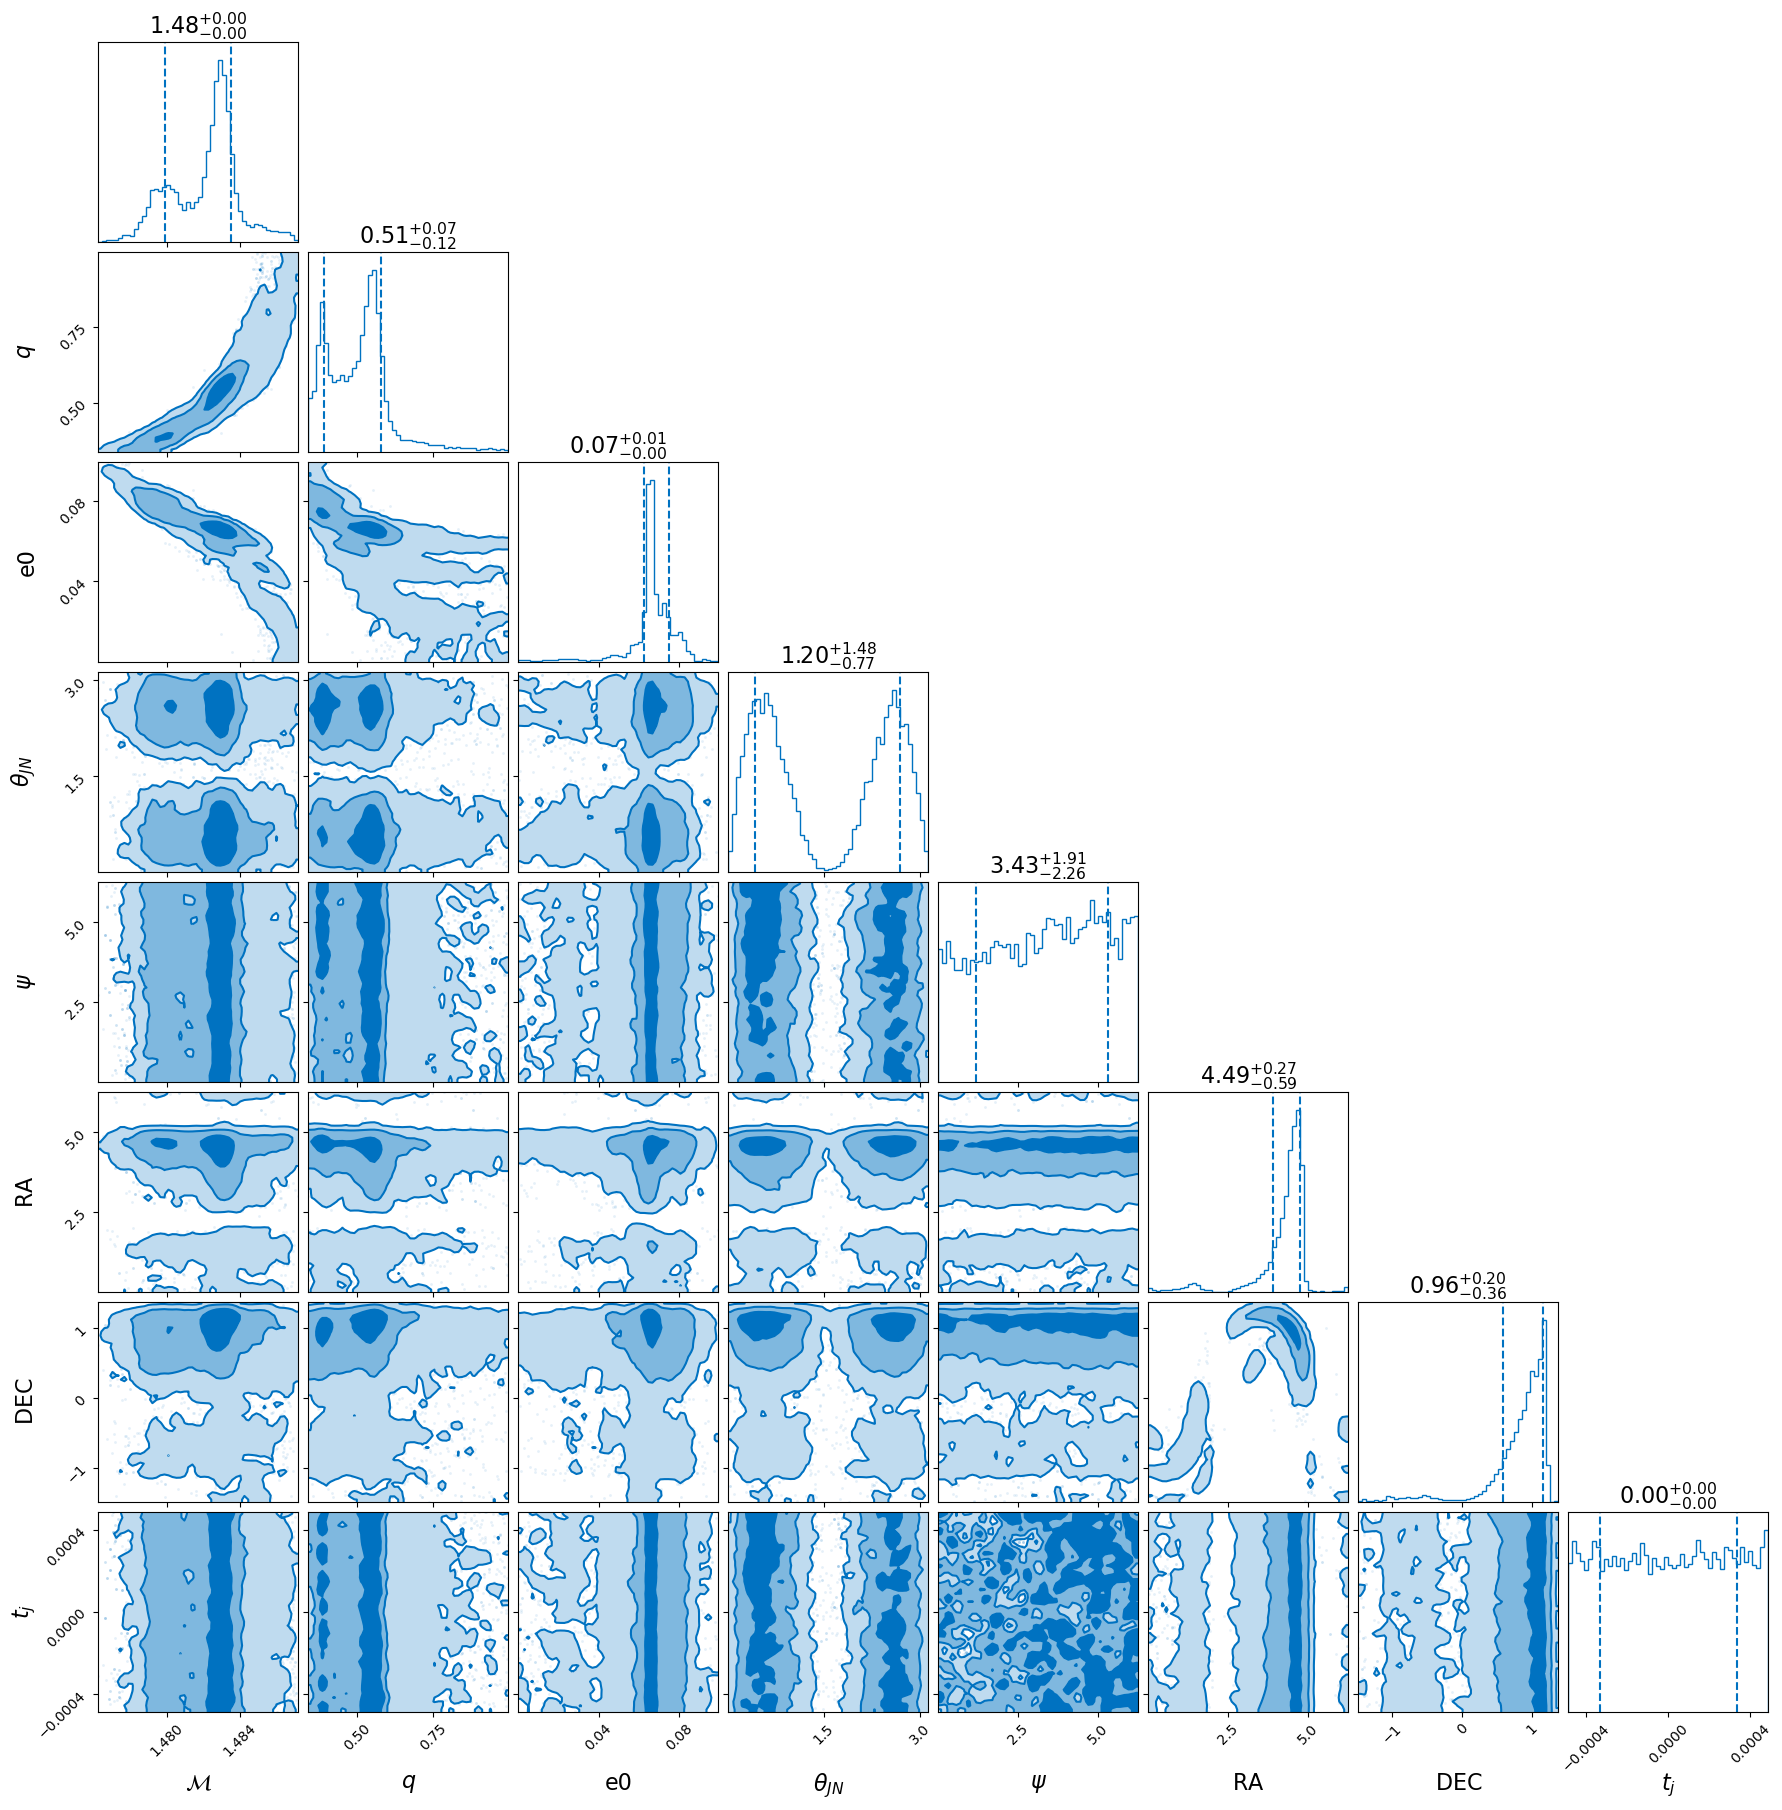

In [7]:
result.plot_corner(outdir='.')

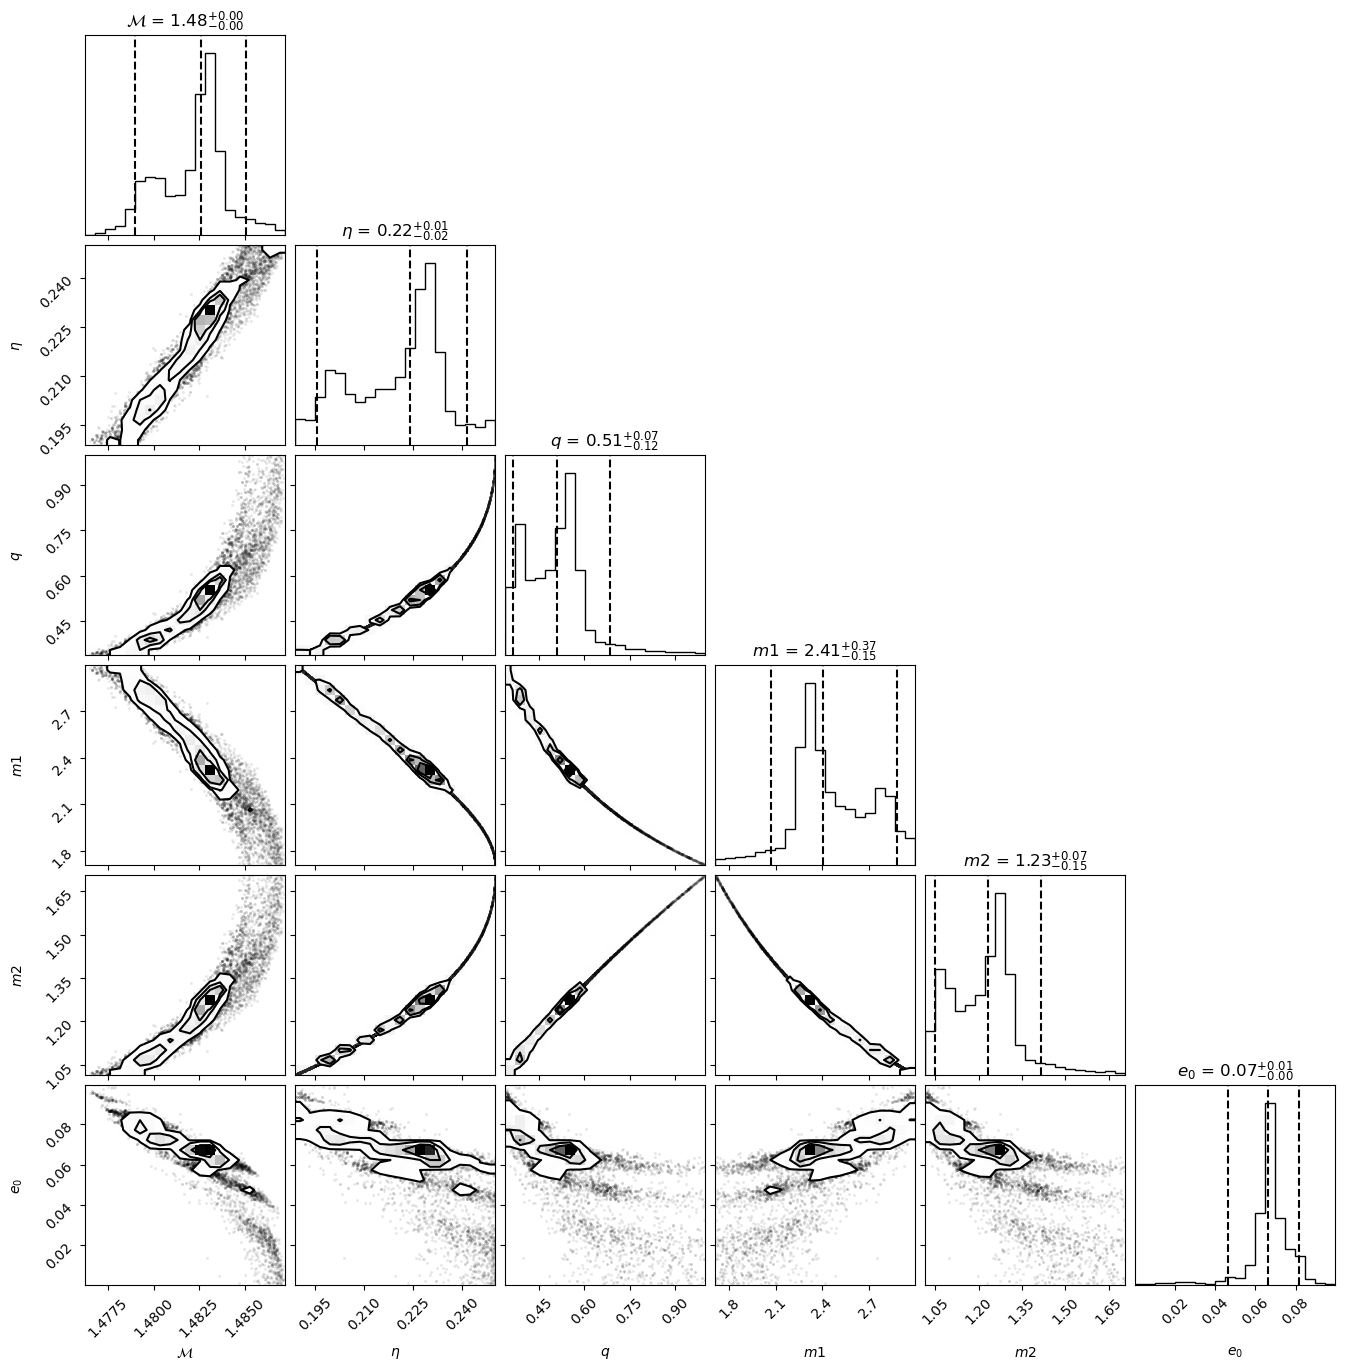

In [22]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
theta_jn = result.posterior["theta_jn"].values
e0 = result.posterior["eccentricity"].values
eta = mass_ratio_/(1+mass_ratio_)**2
m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)

data = np.transpose(np.array([chirp_mass_,eta,mass_ratio_,m1,m2,e0]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$\eta$", r"$q$",r"$m1$", r"$m2$", r"$e_0$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [20]:
result2 = bilby.result.read_in_result("TaylorF2EccFD20Hz_data0_1240215503-017_analysis_L1V1_result.hdf5")

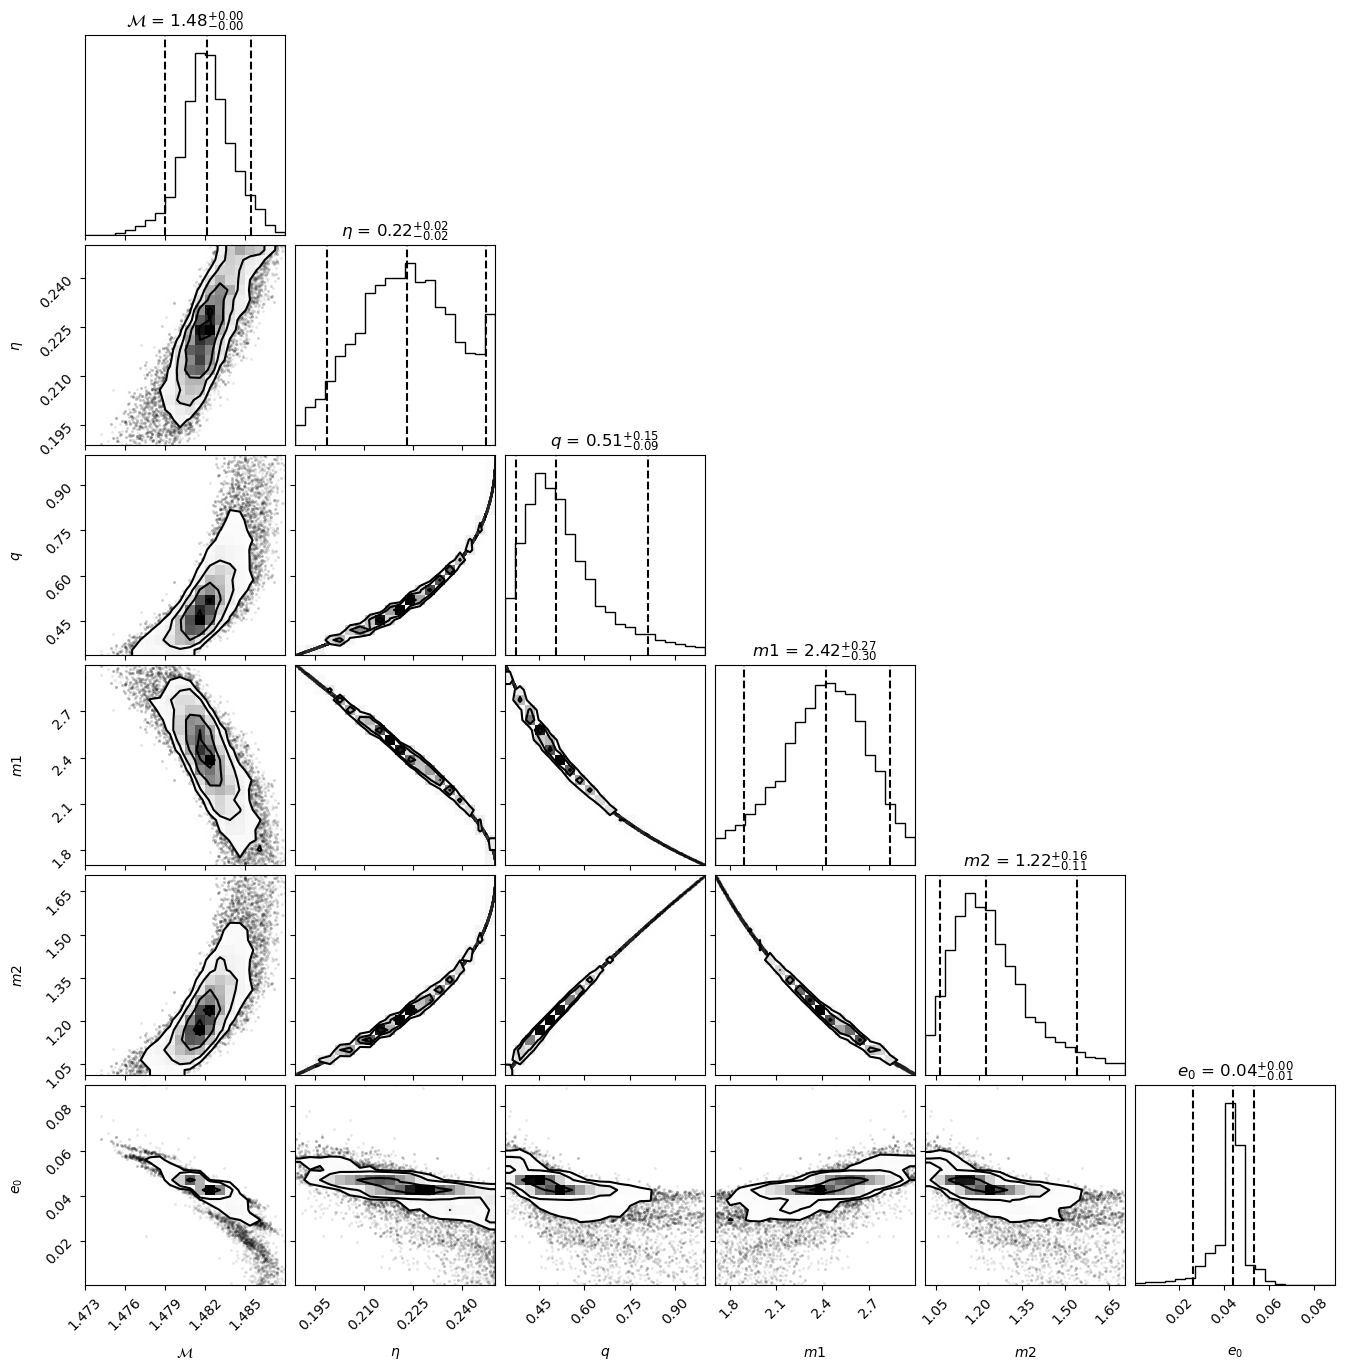

In [23]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
theta_jn2 = result2.posterior["theta_jn"].values
e02 = result2.posterior["eccentricity"].values
eta2 = mass_ratio2/(1+mass_ratio2)**2
m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)

data2 = np.transpose(np.array([chirp_mass2,eta2,mass_ratio2,m12,m22,e02]))
figure = corner.corner(data2, labels=[r"$\mathcal{M}$", r"$\eta$", r"$q$",r"$m1$", r"$m2$", r"$e_0$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

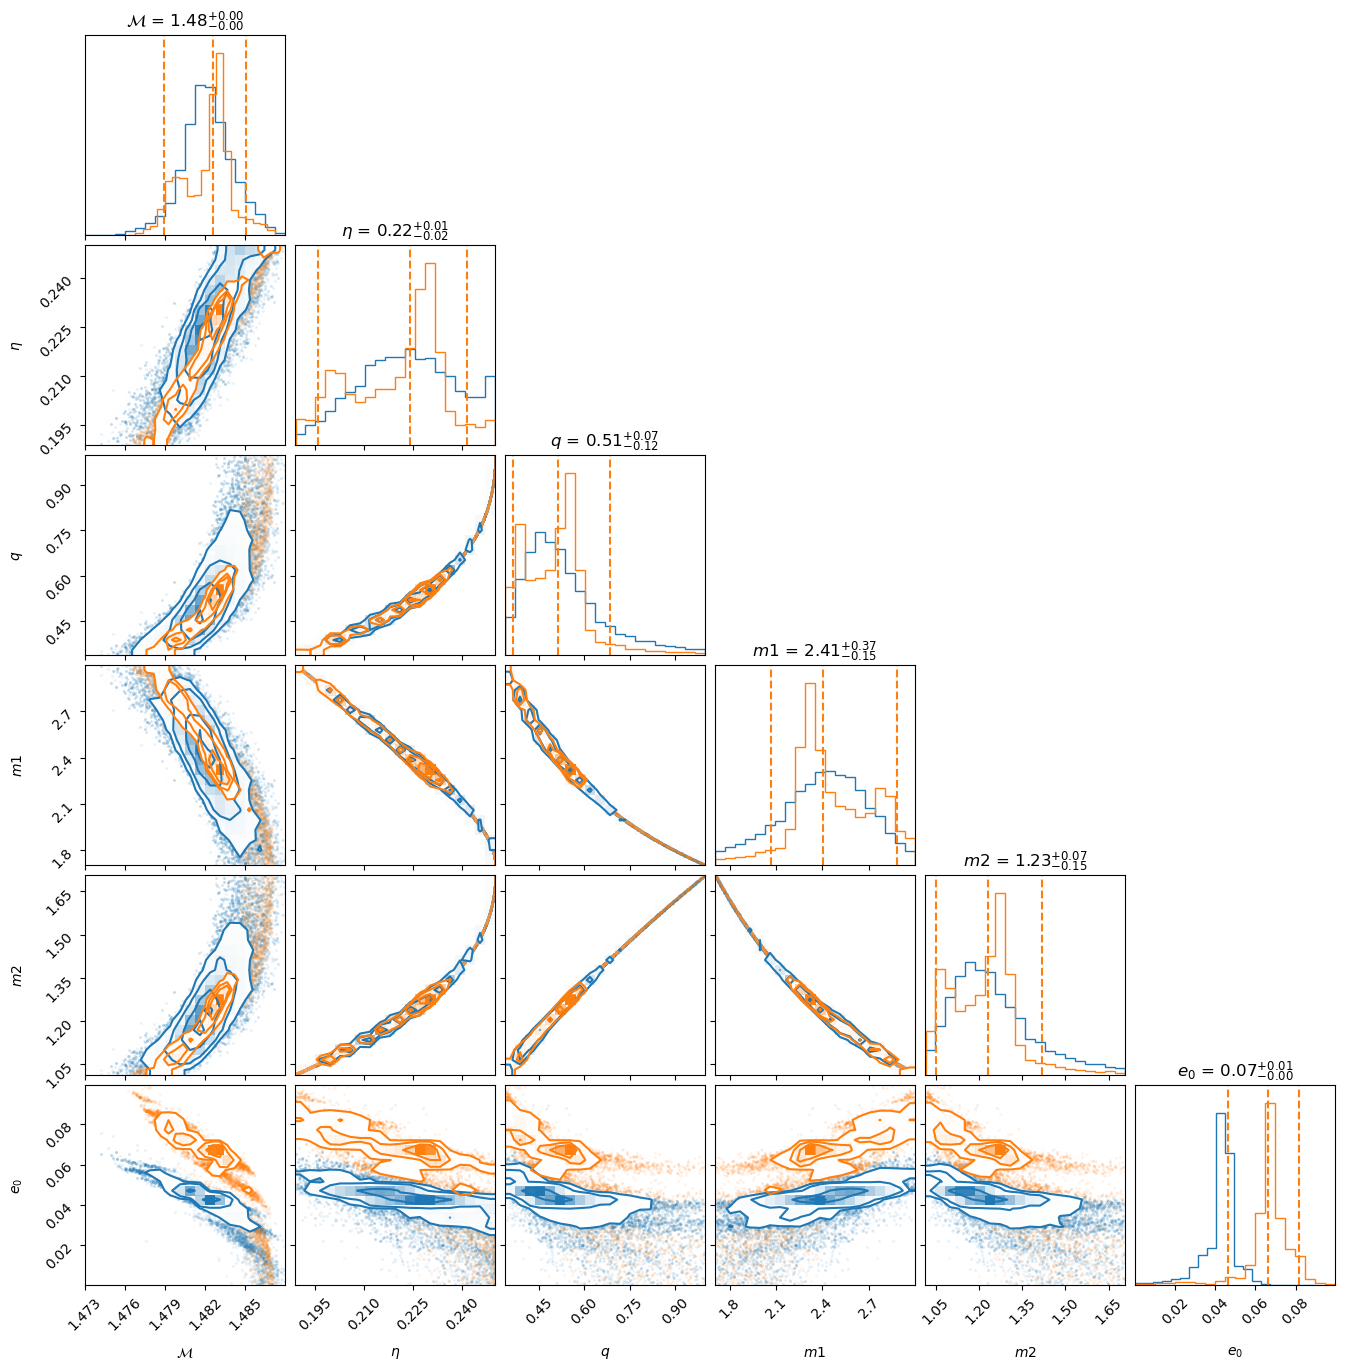

In [27]:
fig = corner.corner(data2,
                       color = 'C0', label='PerAdv')
corner.corner(data, fig=fig, labels=[r"$\mathcal{M}$", r"$\eta$", r"$q$",r"$m1$", r"$m2$", r"$e_0$"], quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12},
                       color = 'C1')

#fig = corner.corner(l1_ps_1[params],color = 'C0')
#corner.corner(l1_ps_2[params],fig=fig,color='C1')
plt.savefig("corner.png")
plt.show()